# Mask Detection and Alert System

**Classification Using CNN need to classify that Human Image Covered With Mask or Not**
# 527 human images (male and female both) for training and for validation 123 humans (M and F) images

In [2]:
import pandas as pd
import numpy  as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization

In [3]:
train_data_path="/content/drive/MyDrive/train"

In [4]:
validation_data_path="/content/drive/MyDrive/validation"

# Data Preprocessing




In [5]:
training_datagen=ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [7]:
valid_datagen=ImageDataGenerator(rescale=1./255)

In [8]:
Validation_data=valid_datagen.flow_from_directory(validation_data_path, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='binary')

Found 256 images belonging to 2 classes.


In [9]:
cnn_model=keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=7, input_shape=[150, 150, 3],kernel_regularizer=l2(l=0.01)),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      
                                    keras.layers.Conv2D(filters=64, kernel_size=5),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                          
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                      
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    BatchNormalization(),
                                    keras.layers.Dropout(0.5),                                      
                                    keras.layers.Dense(units=256, activation='relu'),  
                                    BatchNormalization(),                                  
                                    keras.layers.Dropout(0.5),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])

In [10]:
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 144, 144, 32)      4736      
                                                                 
 batch_normalization (BatchN  (None, 144, 144, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 72, 72, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 68, 68, 64)        51264     
                                                                 
 batch_normalization_1 (Batc  (None, 68, 68, 64)       256       
 hNormalization)                                                 
                                                        

In [12]:
model_path = '/content/drive/MyDrive/Mask_Detection.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint] 

In [13]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=100, 
                          verbose=1, 
                          validation_data= Validation_data,
                          callbacks=callbacks_list)

Epoch 1/100
33/33 [==============================] - ETA: 0s - loss: 0.9660 - accuracy: 0.6368
Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to /content/drive/MyDrive/CNN_Horse_human_project/horse_or_human_predictor.h5
33/33 [==============================] - 215s 6s/step - loss: 0.9660 - accuracy: 0.6368 - val_loss: 0.7799 - val_accuracy: 0.5000
Epoch 2/100
33/33 [==============================] - ETA: 0s - loss: 0.7788 - accuracy: 0.7118
Epoch 00002: val_accuracy did not improve from 0.50000
33/33 [==============================] - 16s 481ms/step - loss: 0.7788 - accuracy: 0.7118 - val_loss: 1.0486 - val_accuracy: 0.5000
Epoch 3/100
33/33 [==============================] - ETA: 0s - loss: 0.7114 - accuracy: 0.7059
Epoch 00003: val_accuracy did not improve from 0.50000
33/33 [==============================] - 16s 482ms/step - loss: 0.7114 - accuracy: 0.7059 - val_loss: 1.5774 - val_accuracy: 0.5000
Epoch 4/100
33/33 [==============================] - ETA: 0s - 

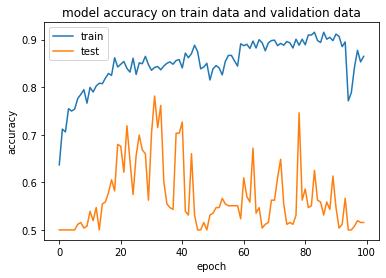

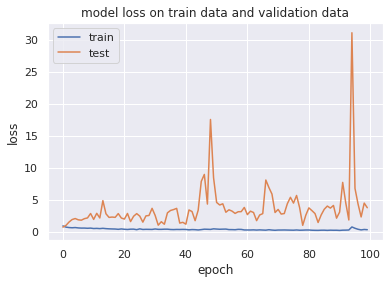

In [16]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy on train data and validation data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
sns.set()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss on train data and validation data')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()